In [20]:
# Imports
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec
from warnings import simplefilter
simplefilter('ignore')

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [2]:
# Reproductability
def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed(31415)

In [3]:
# set matplotlib defautls
plt.rc('figure', autolayout = True)
plt.rc('axes', labelweight = 'bold', labelsize =10, titlesize = 10, titleweight = 'bold', titlepad=  10)
plt.rc('image', cmap = 'magma') # to clean up output cells

In [4]:
# Load training and validation sets
ds_train = image_dataset_from_directory(
            '../input/car-or-truck/train',
            labels = 'inferred',
            image_size = [128, 128],
            interpolation = 'nearest',
            batch_size = 64,
            shuffle = True,           
)

Found 5117 files belonging to 2 classes.


In [5]:
ds_train

<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [6]:
ds_valid = image_dataset_from_directory(
            '../input/car-or-truck/valid',
            labels='inferred',
            label_mode='binary',
            image_size=[128, 128],
            interpolation='nearest',
            batch_size=64,
            shuffle=False,
)

Found 5051 files belonging to 2 classes.


In [7]:
ds_valid

<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

In [8]:
# Data pipeline
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

In [9]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = (ds_train.map(convert_to_float)
            .cache()
            .prefetch(buffer_size = AUTOTUNE))

ds_valid = (ds_valid.map(convert_to_float)
            .cache()
            .prefetch(buffer_size = AUTOTUNE))

In [10]:
ds_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
ds_valid

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

In [12]:
# Define Pretrained Base
pretrained_base = tf.keras.models.load_model(
            '../input/cv-course-models/cv-course-models/vgg16-pretrained-base' )

In [13]:
pretrained_base

In [14]:
# Attach Head
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
            pretrained_base,
            layers.Flatten(),
            layers.Dense(units = 6, activation = 'relu'),
            layers.Dense(units = 1, activation = 'sigmoid')])

In [15]:
model

In [16]:
# train the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['binary_accuracy'])

In [17]:
history = model.fit(
            ds_train,
            validation_data = ds_valid,
            epochs = 10,
            verbose = 1)

Epoch 1/10
80/80 [==============================] - 360s 4s/step - loss: 0.7576 - binary_accuracy: 0.5728 - val_loss: 0.6901 - val_binary_accuracy: 0.5785
Epoch 2/10
80/80 [==============================] - 355s 4s/step - loss: 0.6886 - binary_accuracy: 0.5787 - val_loss: 0.6872 - val_binary_accuracy: 0.5785
Epoch 3/10
80/80 [==============================] - 355s 4s/step - loss: 0.6861 - binary_accuracy: 0.5787 - val_loss: 0.6851 - val_binary_accuracy: 0.5785
Epoch 4/10
80/80 [==============================] - 356s 4s/step - loss: 0.6843 - binary_accuracy: 0.5787 - val_loss: 0.6836 - val_binary_accuracy: 0.5785
Epoch 5/10
80/80 [==============================] - 356s 4s/step - loss: 0.6830 - binary_accuracy: 0.5787 - val_loss: 0.6826 - val_binary_accuracy: 0.5785
Epoch 6/10
80/80 [==============================] - 355s 4s/step - loss: 0.6822 - binary_accuracy: 0.5787 - val_loss: 0.6819 - val_binary_accuracy: 0.5785
Epoch 7/10
80/80 [==============================] - 357s 4s/step - los

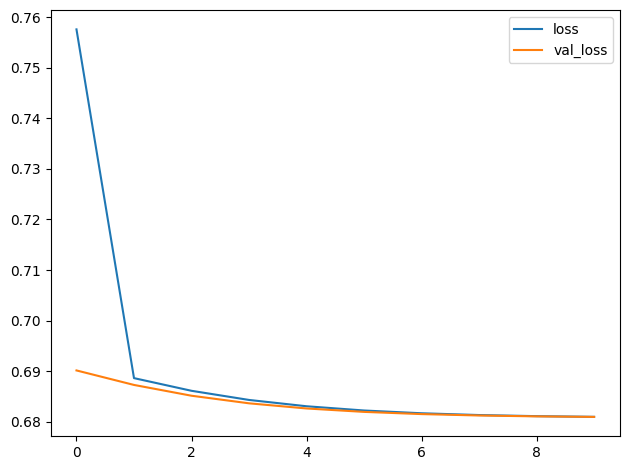

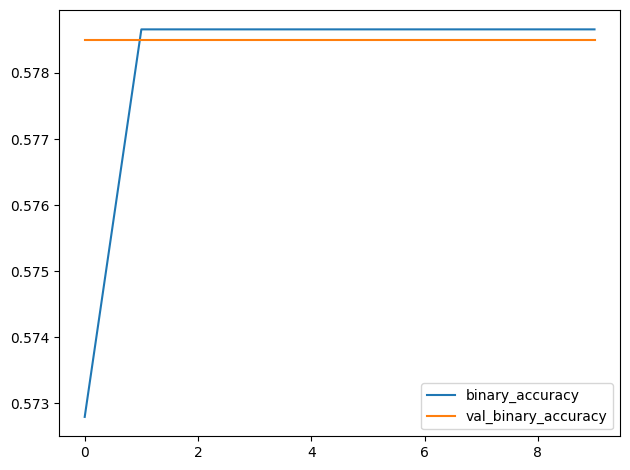

In [19]:
import pandas as pd

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();
